# **آزمایش k-means**

Converged in 2 iterations


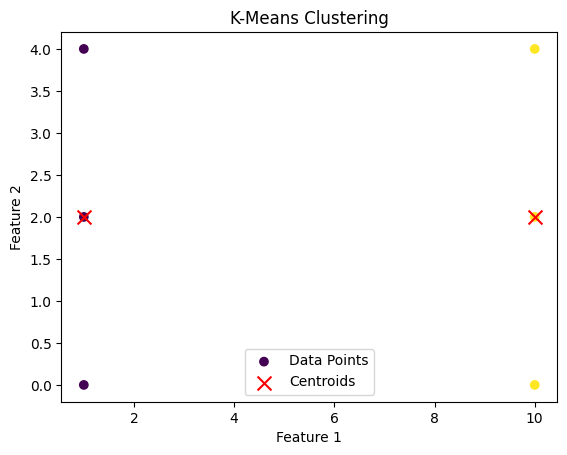

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(n_classes, data):
    n_features = data.shape[1]
    centroids = np.random.random((n_classes, n_features))
    return centroids

def assign_clusters(data, centroids):
    clusters = []
    for entry in data:
        entry_class = 0
        min_distance = float('inf')
        for index, centroid in enumerate(centroids):
            distance = np.linalg.norm(entry - centroid)
            if distance < min_distance:
                min_distance = distance
                entry_class = index
        clusters.append(entry_class)
    return np.array(clusters)

def mean_calculator(data):
    return np.mean(data, axis=0)

def k_means(data, n_classes, max_iterations=100, tol=1e-4):
    centroids = initialize_centroids(n_classes, data)
    for iteration in range(max_iterations):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        for k in range(n_classes):
            points_in_cluster = data[clusters == k]
            if len(points_in_cluster) > 0:
                centroids[k] = mean_calculator(points_in_cluster)
        centroid_shifts = np.linalg.norm(centroids - old_centroids, axis=1)
        if np.all(centroid_shifts < tol):
            print(f"Converged in {iteration} iterations")
            break
    return centroids, clusters


# Sample dataset
data = np.array([
    [1, 2], [1, 4], [1, 0],
    [10, 2], [10, 4], [10, 0]
])
n_classes = 2

centroids, clusters = k_means(data, n_classes)

# Plotting the data points with cluster colors
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


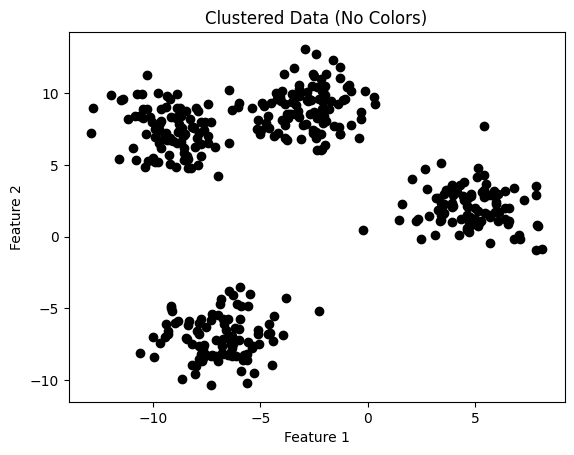

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a dataset with 4 clusters
data, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5, random_state=42)

# Plot the data points (no colors)
plt.scatter(data[:, 0], data[:, 1], c='black', marker='o')  # Set the color to black for all points
plt.title("Clustered Data (No Colors)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Converged in 3 iterations


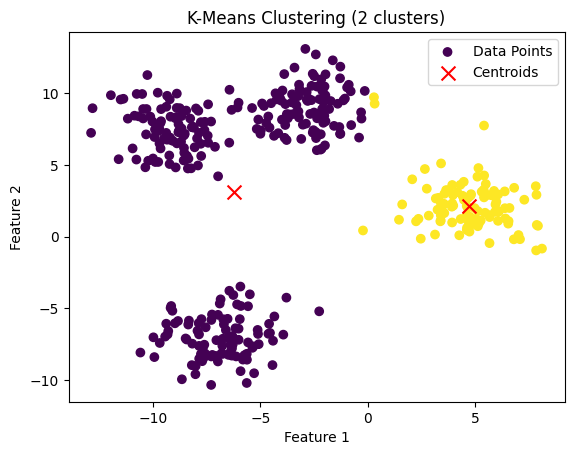

Converged in 2 iterations


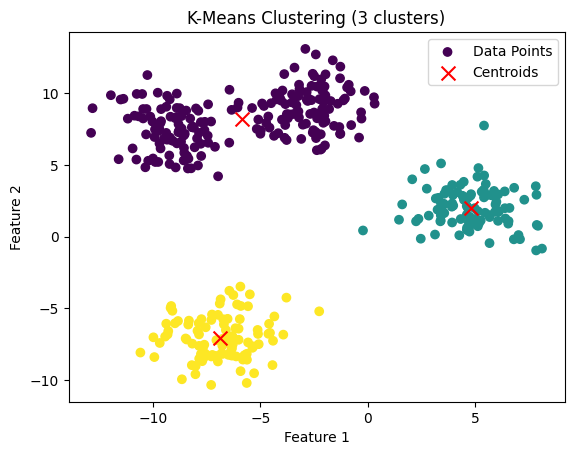

Converged in 5 iterations


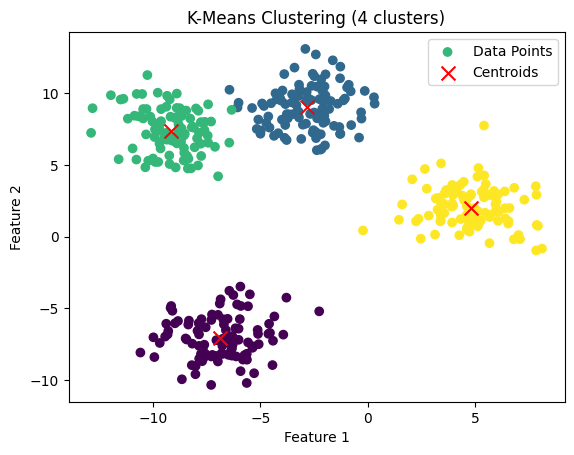

In [ ]:
for i in range(2,5):
  n_classes = i

  centroids, clusters = k_means(data, n_classes)

  # Plotting the data points with cluster colors
  plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
  plt.title(f"K-Means Clustering ({i} clusters)")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.legend()
  plt.show()


همانطور که دیده میشود با هربار اجرای برنامه دسته های متفاوتی ممکن است انتخاب شوند زیرا دسته بندی بستگی به انتخاب نقاط مرکز اولیه دارد

# **ارزیابی**

Converged in 1 iterations
Converged in 3 iterations
Converged in 2 iterations
Converged in 4 iterations
Converged in 9 iterations
Converged in 17 iterations
Converged in 20 iterations
Converged in 16 iterations
Converged in 19 iterations
Converged in 12 iterations
Converged in 13 iterations
Converged in 16 iterations
Converged in 25 iterations
Converged in 12 iterations
Converged in 15 iterations


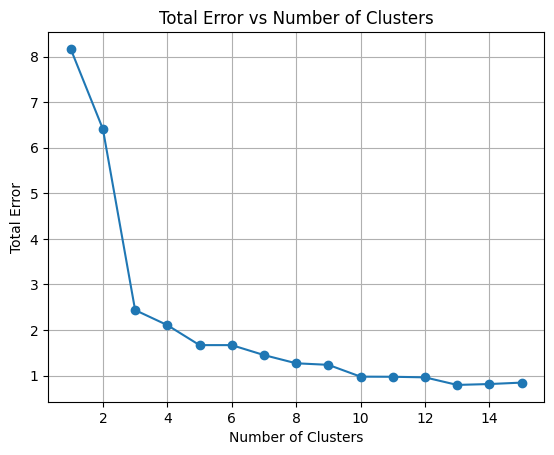

In [ ]:
def calculate_cluster_error(points, clusters, centroids):
    n_clusters = len(centroids)
    cluster_errors = []

    for k in range(n_clusters):
        # Get the points in cluster k
        points_in_cluster = points[clusters == k]
        if len(points_in_cluster) > 0:
            # Calculate the Euclidean distance from each point to the centroid
            distances = np.linalg.norm(points_in_cluster - centroids[k], axis=1)
            # Calculate the mean distance (error) for this cluster
            mean_distance = np.mean(distances)
            cluster_errors.append(mean_distance)
        else:
            cluster_errors.append(0)  # If no points in the cluster, error is 0

    return np.array(cluster_errors)

def calculate_total_error(points, clusters, centroids):
    cluster_errors = calculate_cluster_error(points, clusters, centroids)
    total_error = np.mean(cluster_errors)

    return total_error


total_errors = []
cluster_range = range(1, 16)
for i in cluster_range:
  n_classes = i

  centroids, clusters = k_means(data, n_classes)
  total_errors.append(calculate_total_error(data, clusters, centroids))

plt.plot(cluster_range, total_errors, marker='o')
plt.title("Total Error vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()

# **محدودیت های K-means**

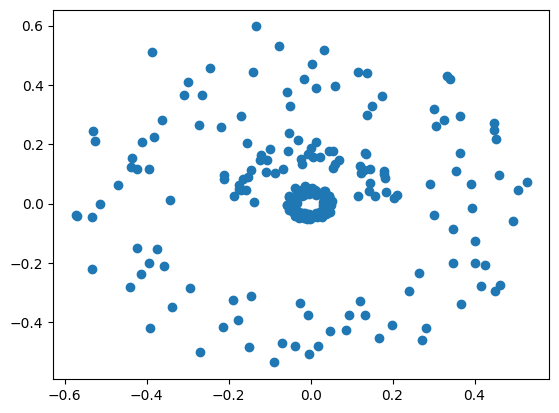

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
x,_ = make_circles(n_samples=100,noise=0.1,shuffle=False)
x1 = 0.5* x
x2 = 0.2* x[x[:,1]>0,:]
x3 = 0.05*x

Data = np.vstack((x1,x2,x3))


plt.scatter(Data[:,0],Data[:,1])
plt.show()

Converged in 7 iterations


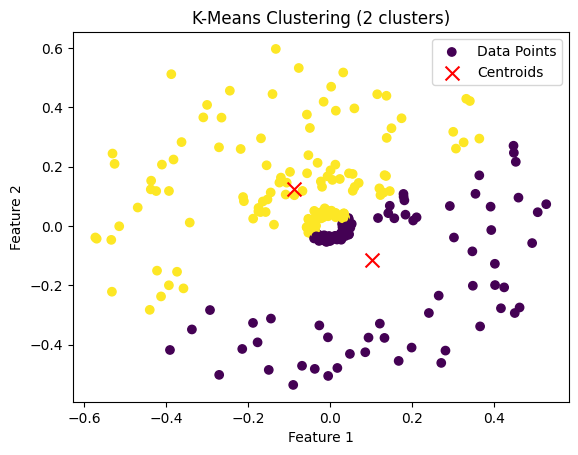

Converged in 11 iterations


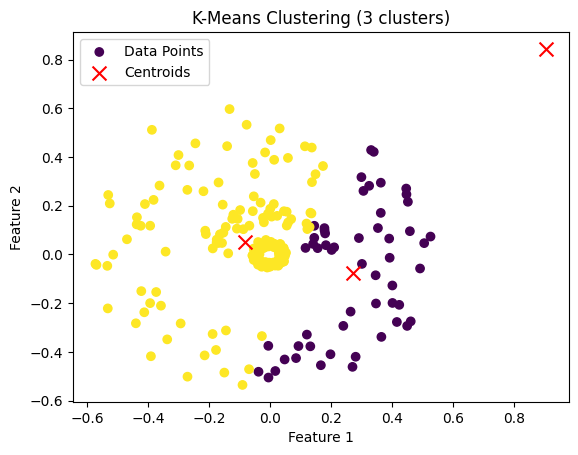

Converged in 9 iterations


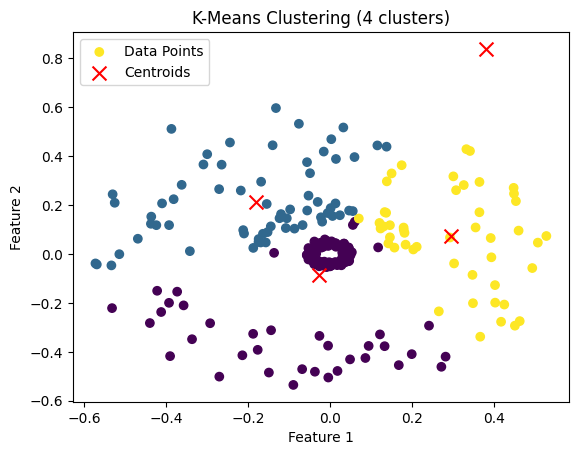

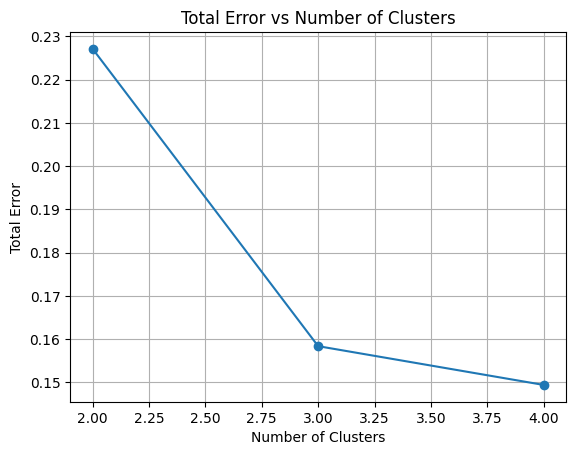

In [ ]:
total_errors = []
cluster_range = range(2, 5)
for i in cluster_range:
  n_classes = i

  centroids, clusters = k_means(Data, n_classes)
  total_errors.append(calculate_total_error(Data, clusters, centroids))

  # Plotting the data points with cluster colors
  plt.scatter(Data[:, 0], Data[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
  plt.title(f"K-Means Clustering ({i} clusters)")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.legend()
  plt.show()

# Plotting total error
plt.plot(cluster_range, total_errors, marker='o')
plt.title("Total Error vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()


# **فشرده سازی تصویر**

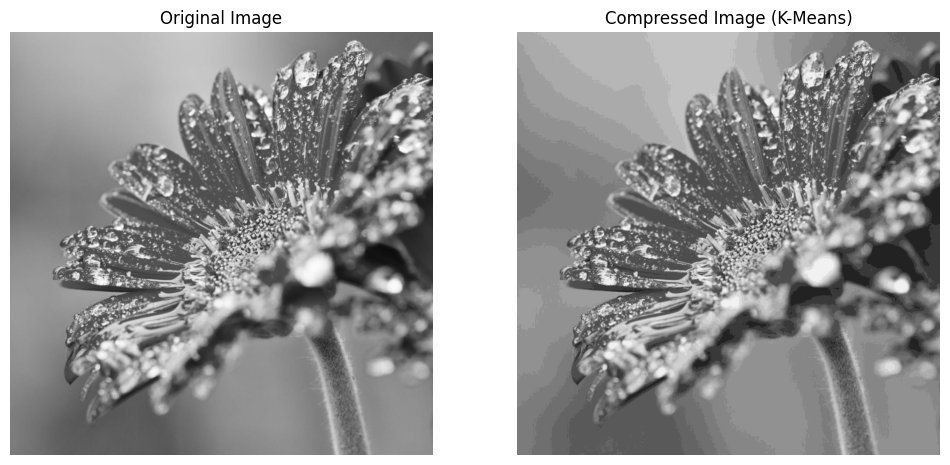

True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2


image = cv2.imread('photo_2024-10-09_16-23-04.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


pixels = image.reshape(-1, 3)


kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(pixels)


centroids = kmeans.cluster_centers_
labels = kmeans.predict(pixels)


compressed_pixels = centroids[labels].astype(np.uint8)
compressed_image = compressed_pixels.reshape(image.shape)


plt.figure(figsize=(12,6))


plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title('Compressed Image (K-Means)')
plt.axis('off')

plt.show()
cv2.imwrite('Compressed_pic.jpg', compressed_image)

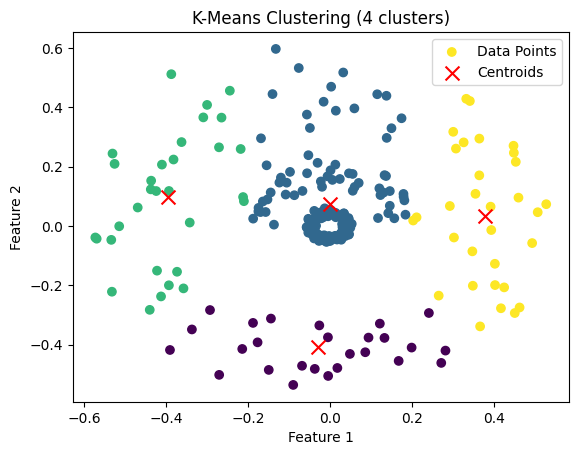

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans.fit(Data)


centroids = kmeans.cluster_centers_
labels = kmeans.predict(Data)

# Plotting the data points with cluster colors
plt.scatter(Data[:, 0], Data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f"K-Means Clustering ({i} clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**مشخصات کتابخانه آماده**
- n_clusters:

تعداد کلاستر ها را مشخص میکند

- init:

الگوریتم مقداردهی اولیه را تعیین میکند

- n_init:

تعداد دفعات مقداردهی اولیه را مشخص میکند و سپس از بین آن ها مقدار بهینه را انتخاب میکند

- max_iter:

تعداد ایتریشن ها را معلوم میکند و بعد از آن الگوریتم متوقف می شود

- tol:

اگر جابجایی مراکز از این مقدار کمتر شود آموزش را متوقف میکند

- verbose:

مقدار لاگ انداختن حین آموزش را تعیین میکند. اگر صفر باشد هیچ لاگی انداخته نمیشود

- random_state:

اگر عدد خاصی مانند 42 گذاشته شود داده های تصادفی ای که برای مقداردهی اولیه تولید میکند قابل بازیابی هستند که برای دیباگ کردن کاربرد دارد. اگر به آن عدد ندهیم هربار به صورت رندوم یک سید را انتخاب میکند

- copy_x:

اگر مقدار آن را به فالس تغییر ندهیم یک کپی از ورودی میگیرد و دیتای اصلی ما دست نخورده باقی میماند

- algorithm:

بصورت پیش فرض الگوریتم اصلی برای کلاسترینگ کا مین را انجام میدهد اما با تغییر آن میتوان با یک الگوریتم دیگر نیز کلاسترینگ را انجام داد که آن الگوریتم برای دیتا های بزرگ کاربرد دارد


**:مقایسه**

این تابع آماده به دلیل بهینه سازی هایی که دارد و انتخاب مقادیر اولیه بهتر نسبت به تابع کد ما بهتر عمل میکند

#:تمرین ها

**تمرین یک**


In [ ]:
pip install kneed

Converged in 1 iterations
Converged in 5 iterations
Converged in 2 iterations
Converged in 18 iterations
Converged in 4 iterations
Converged in 4 iterations
Converged in 7 iterations
Converged in 4 iterations
Converged in 6 iterations
Converged in 8 iterations
Converged in 9 iterations
Converged in 11 iterations
Converged in 5 iterations
Converged in 7 iterations
Converged in 5 iterations


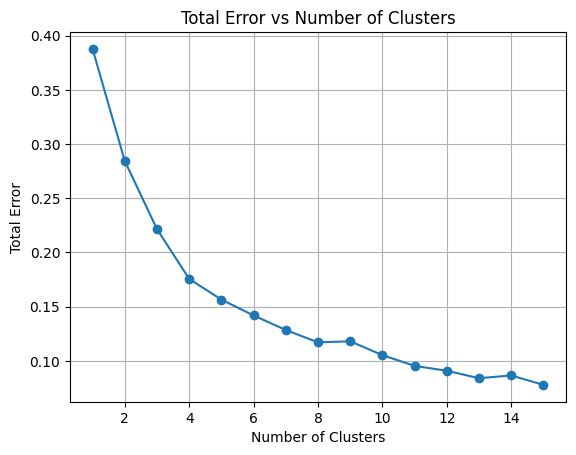

The optimal number of clusters is: 4


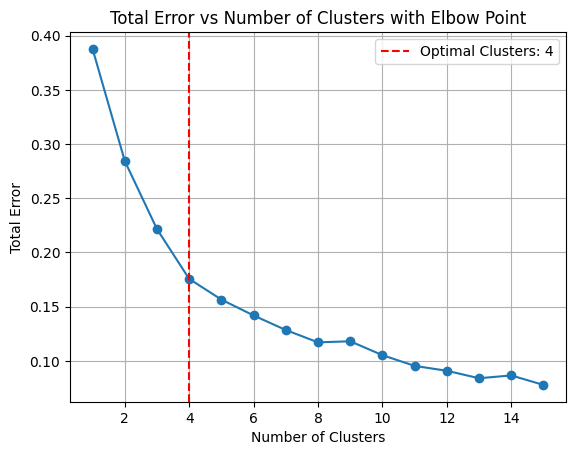

In [ ]:
from kneed import KneeLocator

def calculate_cluster_error(points, clusters, centroids):
    n_clusters = len(centroids)
    cluster_errors = []

    for k in range(n_clusters):
        # Get the points in cluster k
        points_in_cluster = points[clusters == k]
        if len(points_in_cluster) > 0:
            # Calculate the Euclidean distance from each point to the centroid
            distances = np.linalg.norm(points_in_cluster - centroids[k], axis=1)
            # Calculate the mean distance (error) for this cluster
            mean_distance = np.mean(distances)
            cluster_errors.append(mean_distance)
        else:
            cluster_errors.append(0)  # If no points in the cluster, error is 0

    return np.array(cluster_errors)

def calculate_total_error(points, clusters, centroids):
    cluster_errors = calculate_cluster_error(points, clusters, centroids)
    total_error = np.mean(cluster_errors)

    return total_error


# Example of data (replace 'data' with your actual dataset)
data = np.random.rand(100, 2)  # Random data, replace with your actual dataset

total_errors = []
cluster_range = range(1, 16)  # Change the range depending on your needs

for i in cluster_range:
    n_classes = i
    # Assuming you have implemented k_means function
    centroids, clusters = k_means(data, n_classes)
    total_errors.append(calculate_total_error(data, clusters, centroids))

# Plot the total error vs. number of clusters
plt.plot(cluster_range, total_errors, marker='o')
plt.title("Total Error vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()

# Finding the optimal number of clusters using the KneeLocator
kneedle = KneeLocator(cluster_range, total_errors, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f"The optimal number of clusters is: {optimal_k}")

# Plotting the elbow point on the graph
plt.plot(cluster_range, total_errors, marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal Clusters: {optimal_k}')
plt.title("Total Error vs Number of Clusters with Elbow Point")
plt.xlabel("Number of Clusters")
plt.ylabel("Total Error")
plt.grid(True)
plt.legend()
plt.show()


**تمرین ۲ : **

الگوریتم کا مینز اینجا به دلیل محدودیت‌هایی که دارد نتوانسته به درستی داده‌ها را دسته‌بندی کند. در تصویر، داده‌هایی شبیه به دو مارپیچ  دیده می‌شود که به صورت غیرخطی از هم جدا شده‌اند. الگوریتم برای این نوع داده‌ها مناسب نیست و در ادامه دلیل و راه‌حل‌های بهبود را بررسی می‌کنیم.

چرا کا مین در اینجا شکست می‌خورد؟
الگوریتم  فرض می‌کند که خوشه‌ها به صورت کروی یا محدب هستند و می‌توانند با فاصله‌های خطی از هم جدا شوند. اما در این مورد، داده‌ها به صورت مارپیچ و به شکل غیرخطی در هم تنیده شده‌اند.کا مین با استفاده از فاصله اقلیدسی بین نقاط و مراکز خوشه‌ها سعی می‌کند داده‌ها را تقسیم کند، اما این روش برای داده‌هایی که به مرزهای پیچیده‌تر و غیرخطی نیاز دارند، مانند مارپیچ‌های تصویر، ناکارآمد است.

پیشنهاداتی برای بهبود الگوریتم:

 ۱-کا مین با کرنل : این الگوریتم داده‌های غیرخطی را با استفاده از یک تابع کرنل به فضای با بعد بالاتر نگاشت می‌کند، که در آنجا  بهتر عمل می‌کند. از کرنل‌های محبوب می‌توان به کرنل گاوسی آر بی اف اشاره کرد.

۲-  (خوشه‌بندی مبتنی بر تراکم): این الگوریتم براساس تراکم نقاط در فضای داده‌ها عمل می‌کند و برای داده‌های غیرخطی مثل مارپیچ‌ها بسیار مناسب است و به خوبی می‌تواند چنین الگوهایی را شناسایی کند.

۳- خوشه‌بندی طیفی: این روش با استفاده از تئوری گراف و کاهش بعد داده‌ها، خوشه‌بندی را انجام می‌دهد. خوشه‌بندی طیفی برای دسته‌بندی داده‌هایی با الگوهای غیرمحدب، مانند مارپیچ‌ها، بسیار مؤثر است.

۴- مدل‌های مخلوط گاوسی : به جای خوشه‌بندی سخت مثل ، احتمال تعلق هر نقطه به هر خوشه را در نظر می‌گیرد که برای داده‌هایی با توزیع‌های پیچیده‌تر نسبت به  انعطاف بیشتری دارد.

این روش‌ها می‌توانند برای داده‌های پیچیده‌ای مانند آنچه در تصویر مشاهده می‌شود، مرزهای مناسبی را تعریف کرده و خوشه‌بندی بهتری ارائه دهند.

**تمرین ۵**

# **خوشه بندی K-means**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# **import کردن دیتاست**

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = dataset.iloc[:, [3, 4]].values

# **train کردن**

In [ ]:
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [ ]:
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans.max()

7

# **مصور سازی**

In [ ]:
kmeans.cluster_centers_

array([[ 83.58064516,  17.06451613],
       [ 25.0952381 ,  80.04761905],
       [ 78.03571429,  81.89285714],
       [ 25.14285714,  19.52380952],
       [ 44.46875   ,  50.8125    ],
       [108.18181818,  82.72727273],
       [ 61.        ,  48.48076923],
       [124.        ,  17.5       ]])

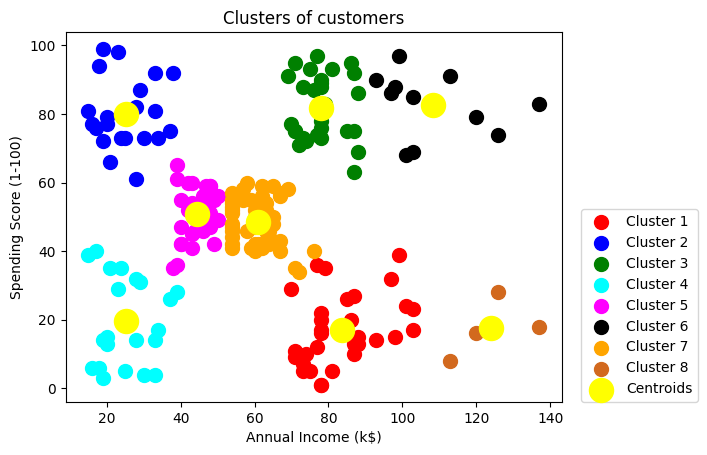

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'orange', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'chocolate', label = 'Cluster 8')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=(1.04,0))
plt.show()

# **استفاده از قانون elbow**

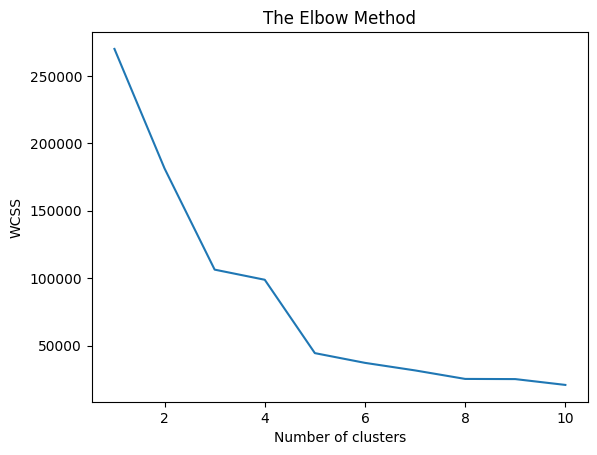

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Train کردن با تعداد خوشه ی مشخص**

In [ ]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

# **مصور سازی**

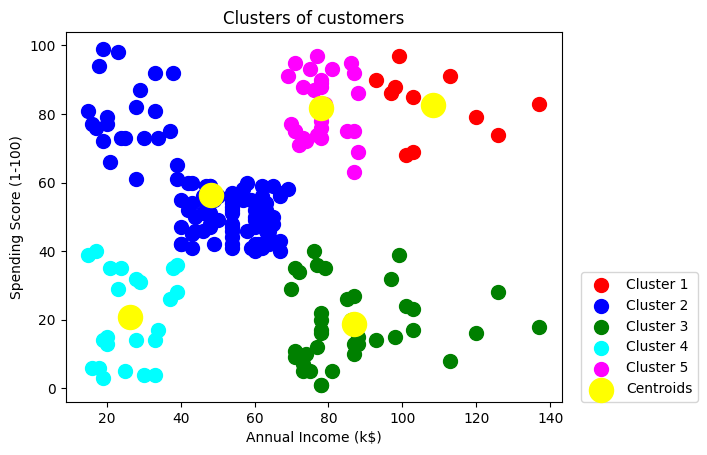

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=(1.04,0))
plt.show()

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [ ]:
def kmeans(X, n_clusters, max_iter=300):
    np.random.seed(42)
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:n_clusters]]

    for _ in range(max_iter):

        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        closest_cluster_ids = np.argmin(distances, axis=1)


        new_centroids = []
        for k in range(n_clusters):
            if np.any(closest_cluster_ids == k):
                new_centroids.append(X[closest_cluster_ids == k].mean(axis=0))
            else:

                new_centroids.append(X[np.random.randint(0, X.shape[0])])
        new_centroids = np.array(new_centroids)


        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids


    distances = np.linalg.norm(X - centroids[closest_cluster_ids], axis=1)
    inertia = np.sum(distances ** 2)

    return closest_cluster_ids, centroids, inertia

In [ ]:
closest_cluster_ids, centroids, inertia = kmeans(X, n_clusters=8)

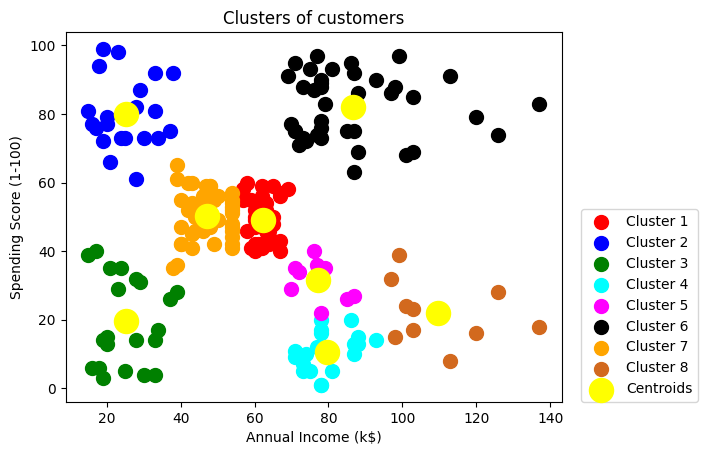

In [ ]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'black', 'orange', 'chocolate']
labels = ['Cluster ' + str(i+1) for i in range(8)]
for i in range(8):
    plt.scatter(X[closest_cluster_ids == i, 0], X[closest_cluster_ids == i, 1],
                s=100, c=colors[i], label=labels[i])

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=(1.04, 0))
plt.show()

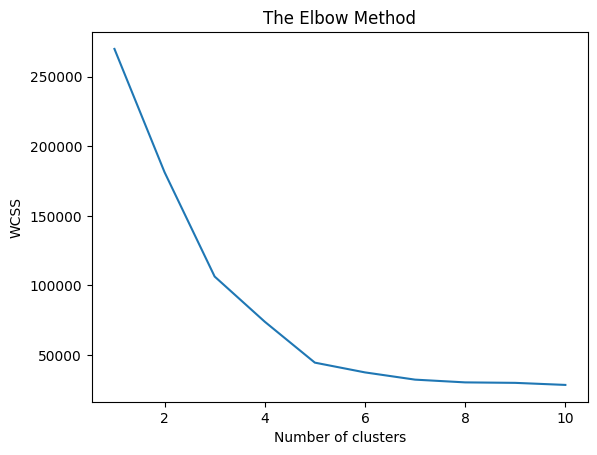

In [ ]:
wcss = []
for i in range(1, 11):
    _, _, inertia = kmeans(X, n_clusters=i)
    wcss.append(inertia)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
closest_cluster_ids, centroids, inertia = kmeans(X, n_clusters=5)

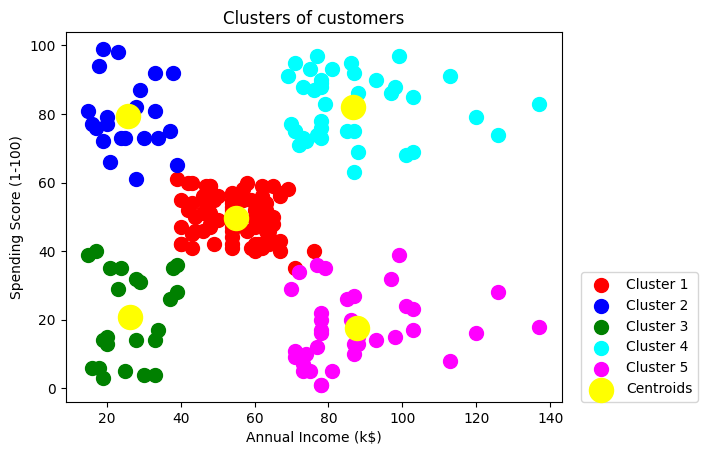

In [ ]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Cluster ' + str(i+1) for i in range(5)]

for i in range(5):
    plt.scatter(X[closest_cluster_ids == i, 0], X[closest_cluster_ids == i, 1],
                s=100, c=colors[i], label=labels[i])

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=(1.04, 0))
plt.show()

**تمرین ۶**


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

data = pd.read_csv(list(uploaded.keys())[0])

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

X = data[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

data.head()


In [ ]:
def plot_elbow_method(X):
    inertia_values = []
    cluster_range = range(1, 11)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia_values, 'bo-')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

plot_elbow_method(X)


با تعداد خوشه‌های انتخاب‌شده
۴ خوشه

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments Based on Income and Spending Score (4 Clusters)')
plt.show()


تاثیر *init*
این پارامتر تعیین میکند که کا مینز چگونه مراکز اولیه خوشه ها را مقداردهی اولیه میکند. مقدار پیش فرض کامینز پلاس پلاس است که معمولا منجر به همگرایی سریع تر میشود اما میتوان از رندوم هم استفاده کرد.

In [ ]:
# اجرای KMeans با روش اولیه‌سازی تصادفی
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (Random Initialization)')
plt.show()

# اجرای KMeans با روش اولیه‌سازی k-means++
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (k-means++ Initialization)')
plt.show()


**تعداد شروع های مختلف**

تعداد دفعاتی که الگوریتم با نقاط اولیه مختلف اجرا می‌شود تا بهترین نتیجه انتخاب شود. مقدار پیش‌فرض 10 است. مقادیر بالاتر باعث افزایش دقت می‌شود اما محاسبات بیشتری نیاز دارد.

In [ ]:
# اجرای KMeans با n_init = 1
kmeans = KMeans(n_clusters=4, n_init=1, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (n_init=1)')
plt.show()

# اجرای KMeans با n_init = 20 (برای دقت بالاتر)
kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (n_init=20)')
plt.show()


**max iter تاثیر**

این پارامتر تعداد بیشترین تکرارهای مجاز الگوریتم برای یافتن خوشه‌ها را تعیین می‌کند. کاهش تعداد تکرارها ممکن است منجر به همگرایی سریع‌تر، اما با دقت کمتر شود.

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=100, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (max_iter=100)')
plt.show()

kmeans = KMeans(n_clusters=4, max_iter=500, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (max_iter=500)')
plt.show()


آستانه همگرایی tol


این پارامتر به الگوریتم می‌گوید زمانی که تغییر در اینرسی بین دو تکرار کمتر از  باشد، همگرا شده و متوقف شود. مقادیر کوچکتر نیاز به دقت بیشتری دارند.


In [ ]:
kmeans = KMeans(n_clusters=4, tol=1e-4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (tol=1e-4)')
plt.show()

# اجرای KMeans با tol = 1e-6 (دقت بالاتر)
kmeans = KMeans(n_clusters=4, tol=1e-6, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments (tol=1e-6)')
plt.show()


پاسخ سوال ۶ با توجه به نمودار ها. 🇰

ان-کلاستر تعداد خوشه ها را مشخص میکند و مستقیما بر تعداد گروه های پیدا شده تاثیر میگذارد


اینیت روش اولیه سازی خوشه ها رامشخص میکند استفاده اس کامینز پلاس پلاس معمولا بهتر از رندوم است


ان اینیت تعداد شروع های مختلف را تنظیم میکند. مقادیر بالاتر باعث دقت بیشتر اما محاسبات بیشتر میشود.

ماکس ایتر تعداد تکرار های مجاز الگوریتم را تعیین میکند. مقادیر بالاتر در صورت همگرایی مشکل مفید است

تال تعیین میکند که تا چه حد تغییر باید کوچک باشد تا همگرایی رخ دهد مقادیر کوچک دقت بیشتری را می طلبند.